In [1]:
%matplotlib inline

In [6]:
from kid_readout.measurement import temperature
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/readout/2016-07-26_183531_Tc.nc')

In [4]:
ncf.node_names()

[u'SweepArray0', u'SweepArray1', u'SweepArray2', u'SweepArray3']

In [5]:
sas = [ncf.read(name) for name in ncf.node_names()]

In [8]:
for sa in sas:
    for stream in sa.stream_arrays:
        temperature.add_temperature(stream, cryostat='starcryo')

ValueError: <kid_readout.measurement.basic.StreamArray object at 0x7f23e92780d0> already has StateDict({'primary_package': 0.14828002964007259, 'primary_load': 3.203})

In [9]:
colors = ['b', 'g', 'r', 'k']

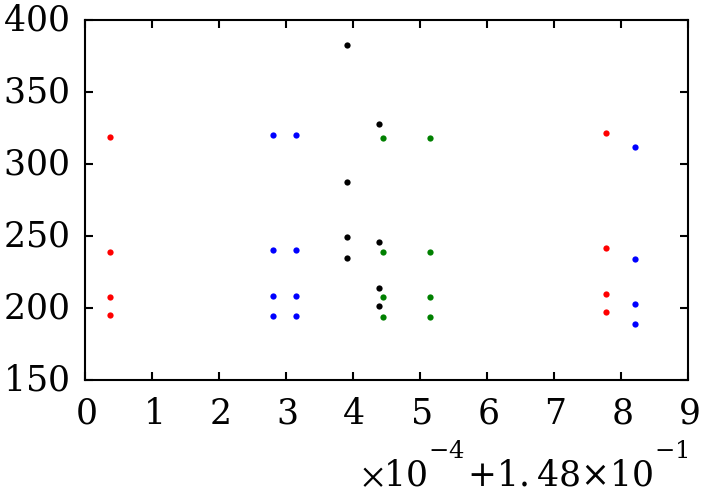

In [14]:
fig, ax = plt.subplots()
for sa, color in zip(sas, colors):
    for stream in sa.stream_arrays:
        ax.plot(stream.tone_bin.size * [stream.state.temperature.primary_package],
                np.abs(stream.s21_point),
               '.', color=color)

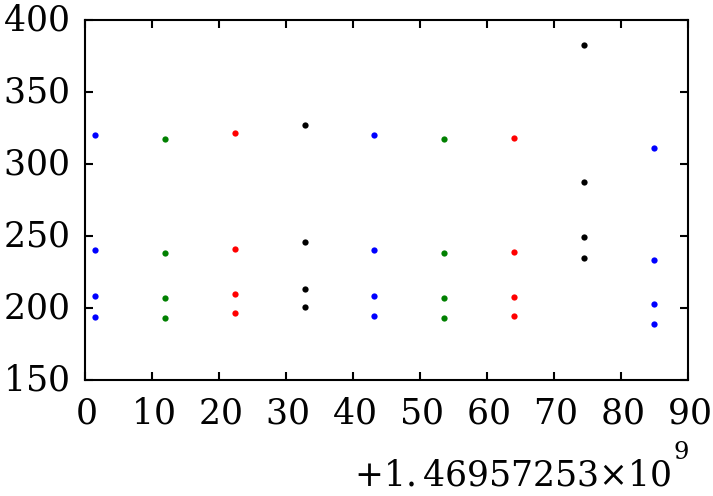

In [15]:
fig, ax = plt.subplots()
for sa, color in zip(sas, colors):
    for stream in sa.stream_arrays:
        ax.plot(stream.tone_bin.size * [stream.epoch],
                np.abs(stream.s21_point),
               '.', color=color)